In [143]:
import pandas as pd
import json 
import os
import datetime
import matplotlib.pyplot as plt
import argparse 
import operator


class dd_list(dict):
    def __missing__(self,k):
        r = self[k] = []
        return r


class FriendsIMessage(dd_list):
    
    def __init__(self):
        self.conversations=[]
        self.all_messages=[]
        self.who_i_message_counts=dict()
        self.who_i_message=dd_list()
        self.top_ten=dd_list()
        self.daily_aggregate=None
        
    def __call__(self,messages_dir):
        self.conversations=self.get_all_conversations(messages_dir)
        self.populate_all_messages(messages_dir)
        self.create_manipulate_dataframes_plot()
        
        
    def get_all_conversations(self,messages_dir):
        """
            :params message_dir: The location of the directory
            :returns: a list of all the directory i.e conversations
            Returns a list of all the converstaion that has taken place.
        """
        conversations=[]
        dirs=[convo for convo in os.listdir(messages_dir) if os.path.isdir(messages_dir+"/"+convo)==True]
        for d in dirs:
            files=[x for x in os.listdir(messages_dir+"/"+d) if os.path.isfile(messages_dir+"/"+d+"/"+x)==True]
            try:
                if files[0]=="message.json":
                    conversations.append(d)
            except:
                pass
        return conversations
            
            
    def populate_all_messages(self,messages_dir):
        """
           This method finds the top ten friends whom i message and stores their 
           messages friendwise.
        """
        for convo in self.conversations:
            f=messages_dir+"/"+convo+"/"+"message.json"
            with open(f) as msg_json_f:
                msg_json=json.load(msg_json_f)
                count=0
                for msg in msg_json["messages"]:
                    values=[]
                    values=[x for x in msg.values()]
                    if values[0]=="Anirban Panda":
                        count=count+1 
                        #count has the total no. of messages i have messaged to a particular friend
                        if len(msg_json["participants"])==2:
                            for x in msg_json["participants"]:
                                title=[y for y in x.values()]
                                if title[0]!= "Anirban Panda":
                                    self.who_i_message[title[0]].append(msg)
                                    
                                    
            if len(msg_json["participants"])==2:
                #checks for a friend and not a group
                     for x in msg_json["participants"]:
                        title1=[y for y in x.values()]
                        if title1[0]!= "Anirban Panda":
                                self.who_i_message_counts[title1[0]]=count
                                
                                    
        
        sv=sorted(self.who_i_message_counts.items(),key=operator.itemgetter(1),reverse=True)
        flag=0
        for x,y in sv:
            
            if flag==10:
                break
            else:
                self.top_ten[x]=self.who_i_message[x]
            flag=flag+1
                

                
                
            
        
    def create_manipulate_dataframes_plot(self):
        """
            This method is used to get all the required columns
            to the dataframe and store the appropriate aggregation in the
            variables and plot each friends messages as a function of time(days) 
        """
        for x in self.top_ten.keys():
            
            msgdf = pd.DataFrame.from_dict(self.top_ten[x])
            msgdf = msgdf[["timestamp_ms", "sender_name"]]
            msgdf["time"] = msgdf["timestamp_ms"].apply(
            lambda x: datetime.datetime.fromtimestamp(x/1000))
            msgdf["day"] = msgdf["time"].apply(lambda convo: convo.day)
            self.daily_aggregate = msgdf["day"].value_counts()
            self.visualize_data(self.daily_aggregate,"Number of Days",
                            "Cummulative Messages", "Cummulative Daily Messages", x)
        
        
        
        
    def cumulative_list(self, lists):
        """
            :params list: The list of values that has to be cummilated
            :returns: The cummilated list

            Turn the dicrete values into continuous value
        """
        cu_list = []
        length = len(lists)
        cu_list = [sum(lists[0:convo + 1]) for convo in range(0, length)]
        return cu_list
    
    
    def visualize_data(self, visualize_points, xlable, ylable, title, msg):
        """
            Create visualization for the given points and show the lables
        """
        print(msg)
        x_axis = visualize_points.index.tolist()[::-1]
        y_axis = visualize_points.tolist()[::-1]
        y_axis = self.cumulative_list(y_axis)
        print(y_axis)
        x, y = zip(*sorted(zip(x_axis, y_axis), key=operator.itemgetter(0)))
        plt.xlabel(xlable)
        plt.ylabel(ylable)
        plt.title(title)
        plt.plot(x, y)
        plt.show()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--msg', help="Message directory location")
    args = parser.parse_args()
    if args.msg is None:
        loc = input('Enter facebook archive extracted location: ')
        # currently only focused on inbox
        loc = loc + "/messages/inbox"
    else:
        loc = args.msg
    if not os.path.isdir(loc):
        print("The provided location doesn't seem to be right")
        exit(1)
    top_10_friends = FriendsIMessage()
    top_10_friends(loc)

       
        
        
                                    
        

usage: ipykernel_launcher.py [-h] [--msg MSG]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-6884c6f2-fe14-4678-bc18-ff583c8a028a.json


SystemExit: 2

/home/hadesanirban/anaconda3/envs/my_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Abhay Kumar Sahoo
[1, 2, 3, 5, 9, 13, 18, 24, 33, 47, 64, 87, 111, 137, 167, 216, 272, 346, 424, 502, 581, 763]


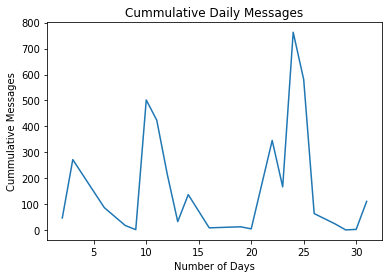

Bhubanendra Mishra
[1, 3, 5, 8, 11, 14, 20, 34, 48, 65, 82, 107, 146, 186, 227, 281, 345, 421, 541, 668]


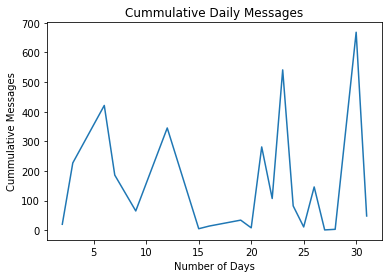

Rupesh Kumar Behera
[1, 2, 5, 11, 19, 31, 48, 66, 93, 123, 187]


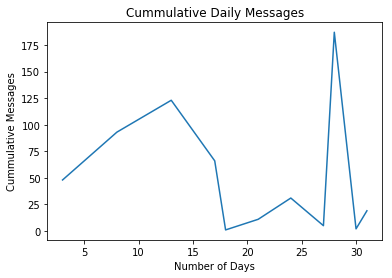

Devansh Kar
[1, 2, 3, 4, 6, 11, 16, 22, 31, 42, 56, 72, 105, 174]


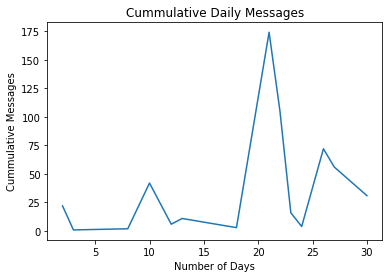

Siddharth Das
[1, 2, 3, 5, 7, 9, 11, 14, 17, 20, 23, 28, 35, 54, 74, 100, 128, 166]


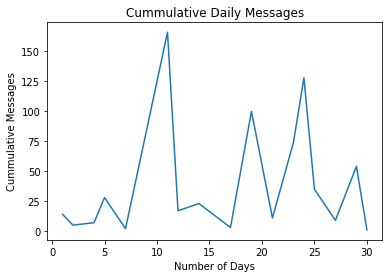

Omkar Mohapatra
[1, 3, 6, 11, 16, 22, 28, 40, 54, 69, 85, 101, 124, 165]


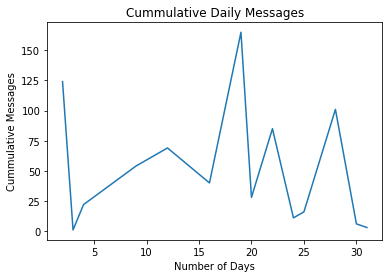

Bimal Kumar Sahoo
[1, 2, 3, 4, 5, 7, 9, 12, 16, 23, 31, 39, 50, 62, 74, 87, 104, 122, 143]


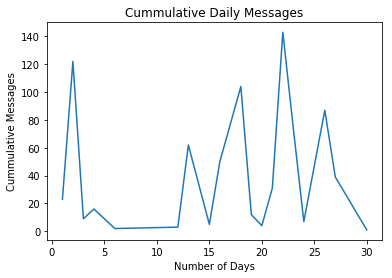

Anirudh Ponna
[1, 2, 4, 8, 13, 18, 24, 31, 41, 52, 66, 85, 137]


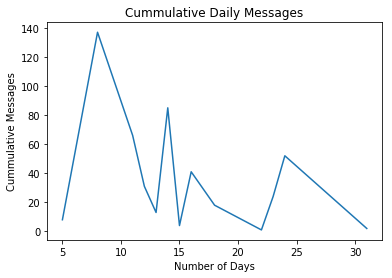

Alok Sahu
[1, 2, 3, 4, 6, 8, 11, 15, 19, 24, 30, 39, 48, 63, 79, 98, 128]


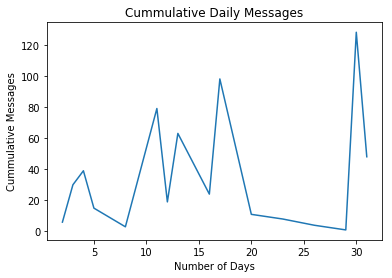

Hara Prasad Sarangi
[1, 2, 3, 4, 5, 6, 7, 9, 11, 14, 17, 21, 25, 30, 37, 45, 55, 68, 83, 100, 119]


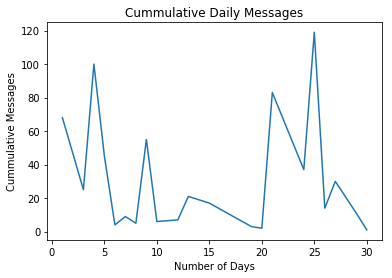